<center>
<h1>Clasificación de imágenes con pesos preentrenados y el modelo VGG19</h1>
<h2>Emilio Pomares Porras @emiliothehuman</h2>
    </center>
<br><img src="https://www.researchgate.net/profile/Clifford_Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg">
<br><br>Procedamos a importar un modelo preentrenado y aplicarlo a una imagen descargada de internet

In [55]:
# Importar cosas necesarias...

import tensorflow as tf
import tensorflow.contrib.keras as keras
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from PIL import Image
L = keras.layers

Importemos el modelo VGG19 con los pesos "imagenet" preentrenados. Atención al parámetro include_top = True, que tendremos que alterar en la siguiente práctica

In [8]:
model = keras.applications.vgg19.VGG19(include_top = True, weights = "imagenet")

574717952/574710816 [==============================] - 146s 0us/step


Echemos un vistazo al modelo:

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Como vemos, la capa de entrada espera tensores de forma (224, 224, 3) -> (píxels hor, píxels ver, canales rgb)

Descarguemos una imagen de internet. Cambia el enlace para descargar la imagen que más te guste. Echa antes un vistazo a la lista de categorías que reconoce este modelo (archivo imagenet1000_clsid_to_human.txt que puedes encontrar en el github del curso) para elegir una imagen con la que vaya a funcionar bien.

In [70]:
!wget "https://www.theflavorbender.com/wp-content/uploads/2014/09/Simpsons-Doughnuts-4140-700x1057.jpg"
# Pongamos un nombre más amigable
os.rename("Simpsons-Doughnuts-4140-700x1057.jpg", "donut.jpg")

--2019-04-18 14:54:29--  https://www.theflavorbender.com/wp-content/uploads/2014/09/Simpsons-Doughnuts-4140-700x1057.jpg
Resolving www.theflavorbender.com (www.theflavorbender.com)... 104.31.84.139, 104.31.85.139, 2606:4700:30::681f:558b, ...
Connecting to www.theflavorbender.com (www.theflavorbender.com)|104.31.84.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45719 (45K) [image/jpeg]
Saving to: ‘Simpsons-Doughnuts-4140-700x1057.jpg’

Simpsons-Doughnuts- 100%[===================>]  44.65K  --.-KB/s    in 0.01s   

2019-04-18 14:54:29 (3.67 MB/s) - ‘Simpsons-Doughnuts-4140-700x1057.jpg’ saved [45719/45719]



Leemos la imagen con Image.open

In [60]:
img = Image.open('donut.jpg')

A ver, a ver...

(700, 1057)


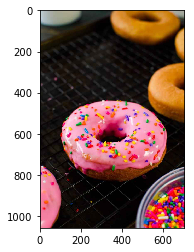

In [62]:
plt.imshow(img)
print(img.size)

¡Ups! La imagen no tiene las dimensiones adecuadas (224x224 px). Reescalémosla:

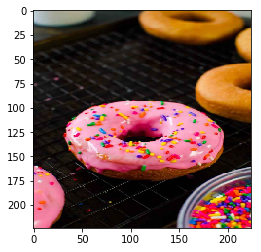

In [71]:
scaledImg = img.resize((224,224))
plt.imshow(scaledImg)

Mmmm.... la proporción de aspecto no es cuadrada, y la imagen aparece achatada. En este caso, la imagen no está tan distorsionada como para que la red la clasifique de manera incorrecta, pero por purismo, vamos a quedarnos con un <i>crop</i> central de la imagen:

In [72]:
squareImg = img.crop((0,200,700,900)).resize((224,224))

Ahora mucho mejor:

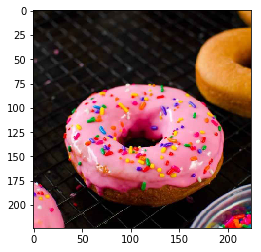

In [73]:
plt.imshow(squareImg)

Convirtamos la imagen a tensor (1, 224, 224, 3):

In [74]:
imdata = np.array(squareImg).reshape(1, 224, 224, 3) # formato (Nº muestras, anchura, altura, canales)

Apliquemos este tensor al modelo, a ver qué nos (pre)dice:

In [68]:
np.argmax(model.predict(imdata))

415

El modelo asocia la máxima probabilidad a la clase 415. Si consultamos imagenet1000_clsidx_to_labels.txt, veremos que corresponde con la categoría "bakery, bakeshot, bakehouse". Así que lo podemos dar por bueno.<br><br>
Para hacer nuestra vida más fácil, importemos el diccionario de datos (File -> open y súbelo a la carpeta del notebook) y definamos una función auxiliar para ayudarnos a clasificar imágenes:

In [45]:
import json

In [50]:
categoryNames = eval(open('imagenet1000_clsidx_to_labels.txt', 'r').read())

In [51]:
def Classify(img):
    cat = np.argmax(model.predict(img))
    print(categoryNames[cat])

Tan sólo tenemos que llamar a Classify dándole como datos de entrada el tensor:

In [53]:
Classify(imdata)

bakery, bakeshop, bakehouse


Experimenta con tus propias imágenes